We are building an end to end multi class image classifier using TensorFlow and TensorFlow Hub.

## 1. Problem Definition

Identifying the breed of a dog given an image of a dog.

## 2. Data

We are using "Dog Breed Identification" dataset from Kaggle: https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

For evaluating we will have to submit a file with prediction probabilities for each of the different dog breeds of each test image.

The file should contain a header and have the following format:

<code>id,affenpinscher,afghan_hound,..,yorkshire_terrier
000621fb3cbb32d8935728e48679680e,0.0083,0.0,...,0.0083
etc.</code>

Details: https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

- We are dealing with unstructured data (images) which means no tabular formed data. So it's best to use Deep Learning / Transfer Learning.
- There are 120 breeds of dogs which means we 120 classes
- There are around 10,000+ images in the training dataset and they are **labeled**
- There are around 10,000+ images in the test dataset but they don't have any labels as it is up to us to predict the labels

---

## Getting the Workspace Ready

- Import TensorFlow ✅
- Import TensorFlowHub ✅
- Connect to GPU ✅

In [1]:
# Import necessary modules
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
# Check versions
print("TensorFlow Version: ", tf.__version__)
print("TensorFlow Hub Version: ", hub.__version__)

TensorFlow Version:  2.5.0
TensorFlow Hub Version:  0.12.0


In [3]:
# Check GPU status
print("GPU", "Available! 😃😀" if tf.config.list_physical_devices("GPU") else "Not Available 😟")

GPU Available! 😃😀


## Getting Our Data Ready

In every machine learning model, our data must be first converted to numerical format. So we have to turn our images into that form too.

Here, we are turning the images into tensors (numerical representation)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # style theme of plots

In [5]:
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/Dataset/labels.csv")

labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,7255557ff8ddf8da70e1efb260830eda,scottish_deerhound
freq,1,126


In [6]:
len(labels_csv)

10222

In [7]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [8]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

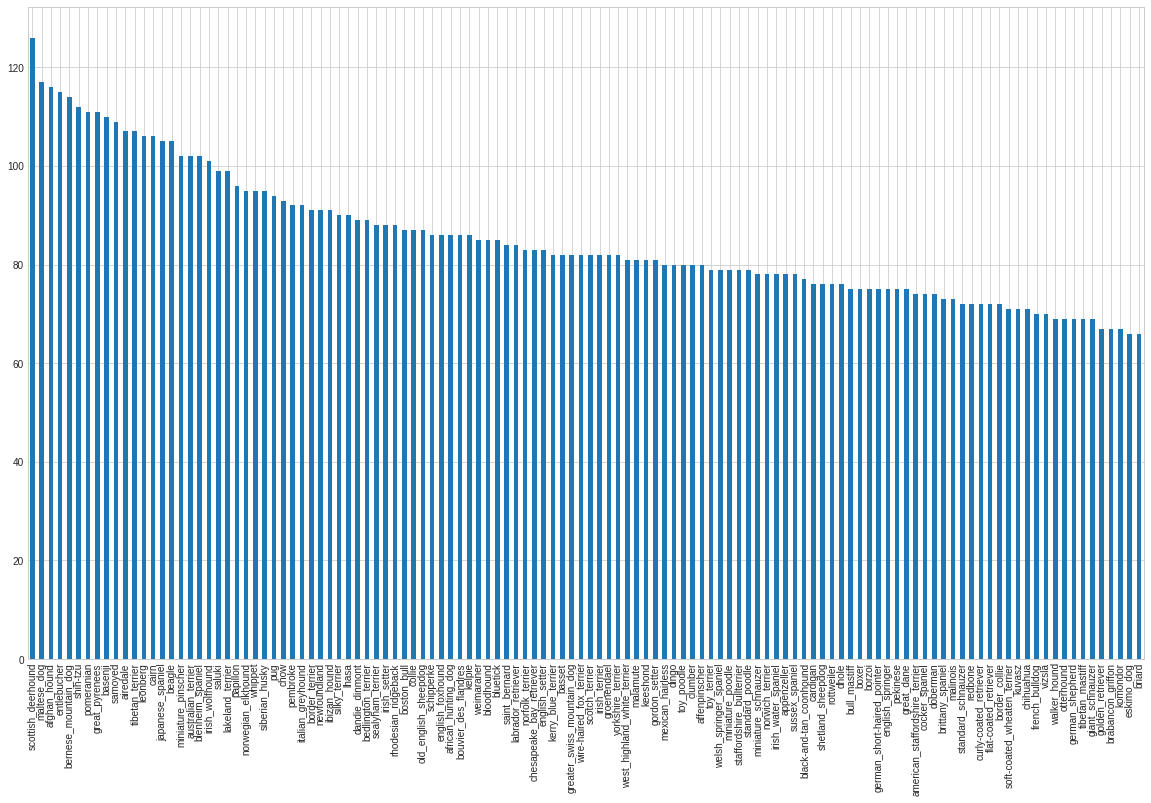

In [9]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,12));

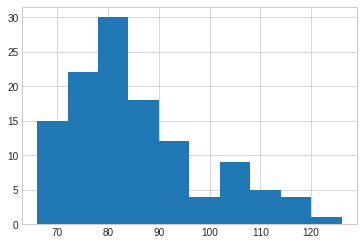

In [10]:
labels_csv["breed"].value_counts().hist();

In [11]:
labels_csv["breed"].value_counts().median()

82.0

In [12]:
# Create pathnames for image ID's
filenames = []

for fname in labels_csv["id"]:
  filenames.append("/content/drive/MyDrive/Dog Vision/Dataset/train/"+fname+".jpg")

filenames[:5]

['/content/drive/MyDrive/Dog Vision/Dataset/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/Dataset/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/Dataset/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/Dataset/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/Dataset/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [13]:
len(filenames)

10222

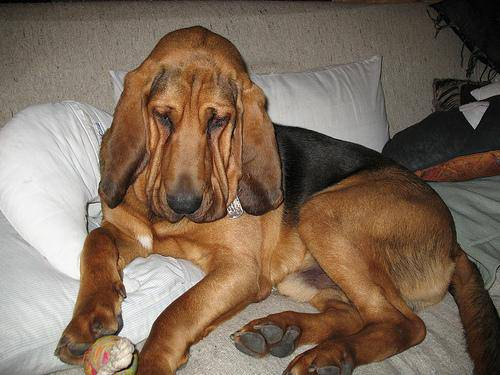

In [14]:
# Module to display images
from IPython.display import Image

Image(filenames[69])

In [15]:
print(f"Breed name of the above image is: " + labels_csv["breed"][69])

Breed name of the above image is: bloodhound


## Turn Data into Number

In [16]:
labels = labels_csv["breed"].to_numpy()

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [17]:
len(labels)

10222

In [18]:
unique_breeds = np.unique(labels)

len(unique_breeds)

120

**Turn every label into boolean array**

In [19]:
boolean_labels = [label == unique_breeds for label in labels]

boolean_labels[69]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
len(boolean_labels)

10222

In [21]:
print(labels[69])
print(boolean_labels[69].astype(int))

bloodhound
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
